## Exploring Border Entry Dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import pandas as pd

In [3]:
# importing the dataset
dataset = pd.read_csv('./data/usitc/border_crossing_entry_data.csv')

In [4]:
#determine shape
dataset.shape

(353962, 7)

In [5]:
list(dataset.columns)

['Port Name', 'State', 'Port Code', 'Border', 'Date', 'Measure', 'Value']

In [11]:
#examine top of dataset
dataset.head()

Port Name State  Port Code            Border            Date  \
0         Alexandria Bay    NY        708  US-Canada Border  12/1/2019 0:00   
1               Baudette    MN       3424  US-Canada Border  12/1/2019 0:00   
2                 Blaine    WA       3004  US-Canada Border  12/1/2019 0:00   
3            Brownsville    TX       2301  US-Mexico Border  12/1/2019 0:00   
4  Buffalo-Niagara Falls    NY        901  US-Canada Border  12/1/2019 0:00   

          Measure  Value  
0  Bus Passengers    740  
1  Bus Passengers     83  
2  Bus Passengers  17029  
3  Bus Passengers   4668  
4  Bus Passengers   9910

In [10]:
# create new dataframe for the US-Mexico border crossings only
# there are 82288 observances
borderMX = dataset[(dataset['Border']=="US-Mexico Border")]
borderMX.shape

(82288, 7)

In [12]:
variables = list(borderMX.columns)
print(variables)

['Port Name', 'State', 'Port Code', 'Border', 'Date', 'Measure', 'Value']


In [9]:
#determine how many points of entry are captured
borderMX["Port Name"].nunique()

27

In [13]:
# what are the names of the ports of entry
borderMX["Port Name"].unique()

array(['Brownsville', 'Calexico East', 'Columbus', 'Douglas',
       'Eagle Pass', 'El Paso', 'Hidalgo', 'Laredo', 'Lukeville',
       'Nogales', 'Otay Mesa', 'Presidio', 'Roma', 'San Luis',
       'San Ysidro', 'Santa Teresa', 'Andrade', 'Boquillas', 'Calexico',
       'Cross Border Xpress', 'Del Rio', 'Naco', 'Progreso',
       'Rio Grande City', 'Sasabe', 'Tecate', 'Tornillo-Fabens'],
      dtype=object)

## Determine if ports of entry are inconsitently represented in the dataset

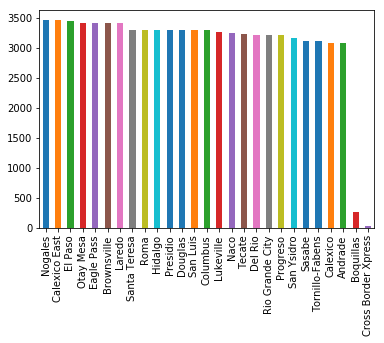

In [14]:
## each port of entry appears to be represented fairly consistently
borderMX["Port Name"].value_counts().plot(kind="bar")

In [15]:
# determine which ports of entry get the highest traffic
borderMX.head()

Port Name State  Port Code            Border            Date  \
3     Brownsville    TX       2301  US-Mexico Border  12/1/2019 0:00   
6   Calexico East    CA       2507  US-Mexico Border  12/1/2019 0:00   
8        Columbus    NM       2406  US-Mexico Border  12/1/2019 0:00   
11        Douglas    AZ       2601  US-Mexico Border  12/1/2019 0:00   
13     Eagle Pass    TX       2303  US-Mexico Border  12/1/2019 0:00   

           Measure  Value  
3   Bus Passengers   4668  
6   Bus Passengers   4080  
8   Bus Passengers   1452  
11  Bus Passengers    107  
13  Bus Passengers   8525

In [16]:
#understand the number of unique measures and the different types unique values
borderMX["Measure"].nunique()

12

In [17]:
borderMX["Measure"].unique()

array(['Bus Passengers', 'Buses', 'Pedestrians',
       'Personal Vehicle Passengers', 'Personal Vehicles',
       'Rail Containers Empty', 'Rail Containers Full',
       'Train Passengers', 'Trains', 'Truck Containers Empty',
       'Truck Containers Full', 'Trucks'], dtype=object)

## Extract just the year as a new variable in the dataframe


In [18]:
import numpy as np
import datetime

In [19]:
borderMX['year']= pd.DatetimeIndex(borderMX['Date']).year

C:\Users\nhinojos\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
borderMX.head(10)

Port Name State  Port Code            Border            Date  \
3     Brownsville    TX       2301  US-Mexico Border  12/1/2019 0:00   
6   Calexico East    CA       2507  US-Mexico Border  12/1/2019 0:00   
8        Columbus    NM       2406  US-Mexico Border  12/1/2019 0:00   
11        Douglas    AZ       2601  US-Mexico Border  12/1/2019 0:00   
13     Eagle Pass    TX       2303  US-Mexico Border  12/1/2019 0:00   
14        El Paso    TX       2402  US-Mexico Border  12/1/2019 0:00   
18        Hidalgo    TX       2305  US-Mexico Border  12/1/2019 0:00   
23         Laredo    TX       2304  US-Mexico Border  12/1/2019 0:00   
25      Lukeville    AZ       2602  US-Mexico Border  12/1/2019 0:00   
29        Nogales    AZ       2604  US-Mexico Border  12/1/2019 0:00   

           Measure  Value  year  
3   Bus Passengers   4668  2019  
6   Bus Passengers   4080  2019  
8   Bus Passengers   1452  2019  
11  Bus Passengers    107  2019  
13  Bus Passengers   8525  2019  
14  Bus Passengers  39745  2019  
18  Bus Passengers  26540  2019  
23  Bus Passengers  81239  2019  
25  Bus Passengers    491  2019  
29  Bus Passengers  17302  2019

In [24]:
years_list = list(borderMX['year'].unique())
print(years_list)

[2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996]


In [141]:
# create new dataframe with just the 
relevantDF = borderMX[["year","Value","Port Name"]].copy()
relevantDF.shape

(82288, 3)

In [68]:
## testing for loop accuracy
testing1996 = relevantDF[relevantDF["year"]==1996]
testing1996.shape

(3600, 3)

## Sum the variable value for each dataframe 

#### Building a function to get the column sum of the years

In [107]:
# importing library to use sum method across columns
import scipy.stats

In [154]:
value_list=[]

def create_df(year):
    print("Creating a new data frame for",year,"- note that the df name will not change.")
    name = relevantDF[relevantDF["year"]==year]
    value = name["Value"].sum(axis=0)
    value_list.append(value)
    print("Shape of the new data frame is",name.shape)
    print("The sum of the value column for",year,"is:",value,"\n---------------------------")


In [158]:
print(value_list)

[275538145, 283743197, 278703002, 273532405, 267663436, 254746277, 243982227, 232999664, 225541089, 242776894, 264450245, 295921230, 310095754, 327588026, 336990567, 343524676, 343654239, 352870123, 362991511, 392231869, 391959396, 366296614, 348661488, 276751448]


In [159]:
print(len(value_list))

24


In [157]:
## creating a for loop to create data frames for each year, and this will make my life easier, yay
for year in years_list:
    create_df(year)

Creating a new data frame for 2019 - note that the df name will not change.
Shape of the new data frame is (2321, 3)
The sum of the value column for 2019 is: 275538145 
---------------------------
Creating a new data frame for 2018 - note that the df name will not change.
Shape of the new data frame is (2313, 3)
The sum of the value column for 2018 is: 283743197 
---------------------------
Creating a new data frame for 2017 - note that the df name will not change.
Shape of the new data frame is (2331, 3)
The sum of the value column for 2017 is: 278703002 
---------------------------
Creating a new data frame for 2016 - note that the df name will not change.
Shape of the new data frame is (3179, 3)
The sum of the value column for 2016 is: 273532405 
---------------------------
Creating a new data frame for 2015 - note that the df name will not change.
Shape of the new data frame is (3744, 3)
The sum of the value column for 2015 is: 267663436 
---------------------------
Creating a new 